<a href="https://colab.research.google.com/github/maronga/Wk-7-Core-IP/blob/main/Wk_7_Core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.0 DEFINING THE QUESTION**

A.) SPECIFYING THE QUESTION

To find out the factors that affect housing prices using the dataset which gives information on real estate properties

B.)DEFINING THE METRIC FOR SUCCESS

. Determining the factors that affect housing prices

. Developing a model which can predict the housing prices

C.) UNDERSTANDING THE CONTEXT

The dataset provided should be analysed inorder to study the factors that affect housing prices then later on use the given information to accurately predict the sale of prices

1.4 RECORDING THE EXPERIMENTAL DESIGN

Loading the data

Reading the data

Tidying the data

Exploratory Data Analysis

Carrying out various regression models

Follow-up questions

1,5 ASSESSING THE RELEVANCE OF THE DATA

**2. LOADING THE DATASET**

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

In [70]:
df=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**3. CHECKING THE DATA**

In [71]:
#Checking the first columns of the dataset 
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [72]:
#Checking the last fifth columns of the dataset
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [73]:
#Get the number of rows and column
df.shape

(21613, 20)

The dataset has the 21613 rows and 20 columns

In [74]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [75]:
#Checking the general descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [76]:
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

**4. DATA CLEANING**

In [77]:
#Checking for the number of null values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The dataset has no null values

In [78]:
#Checking for duplicates in the dataset
df.duplicated().sum()

3

The dataset has 3 duplicates

In [79]:
#Dropping all duplicates
#Confirming if the duplicates have been dropped
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

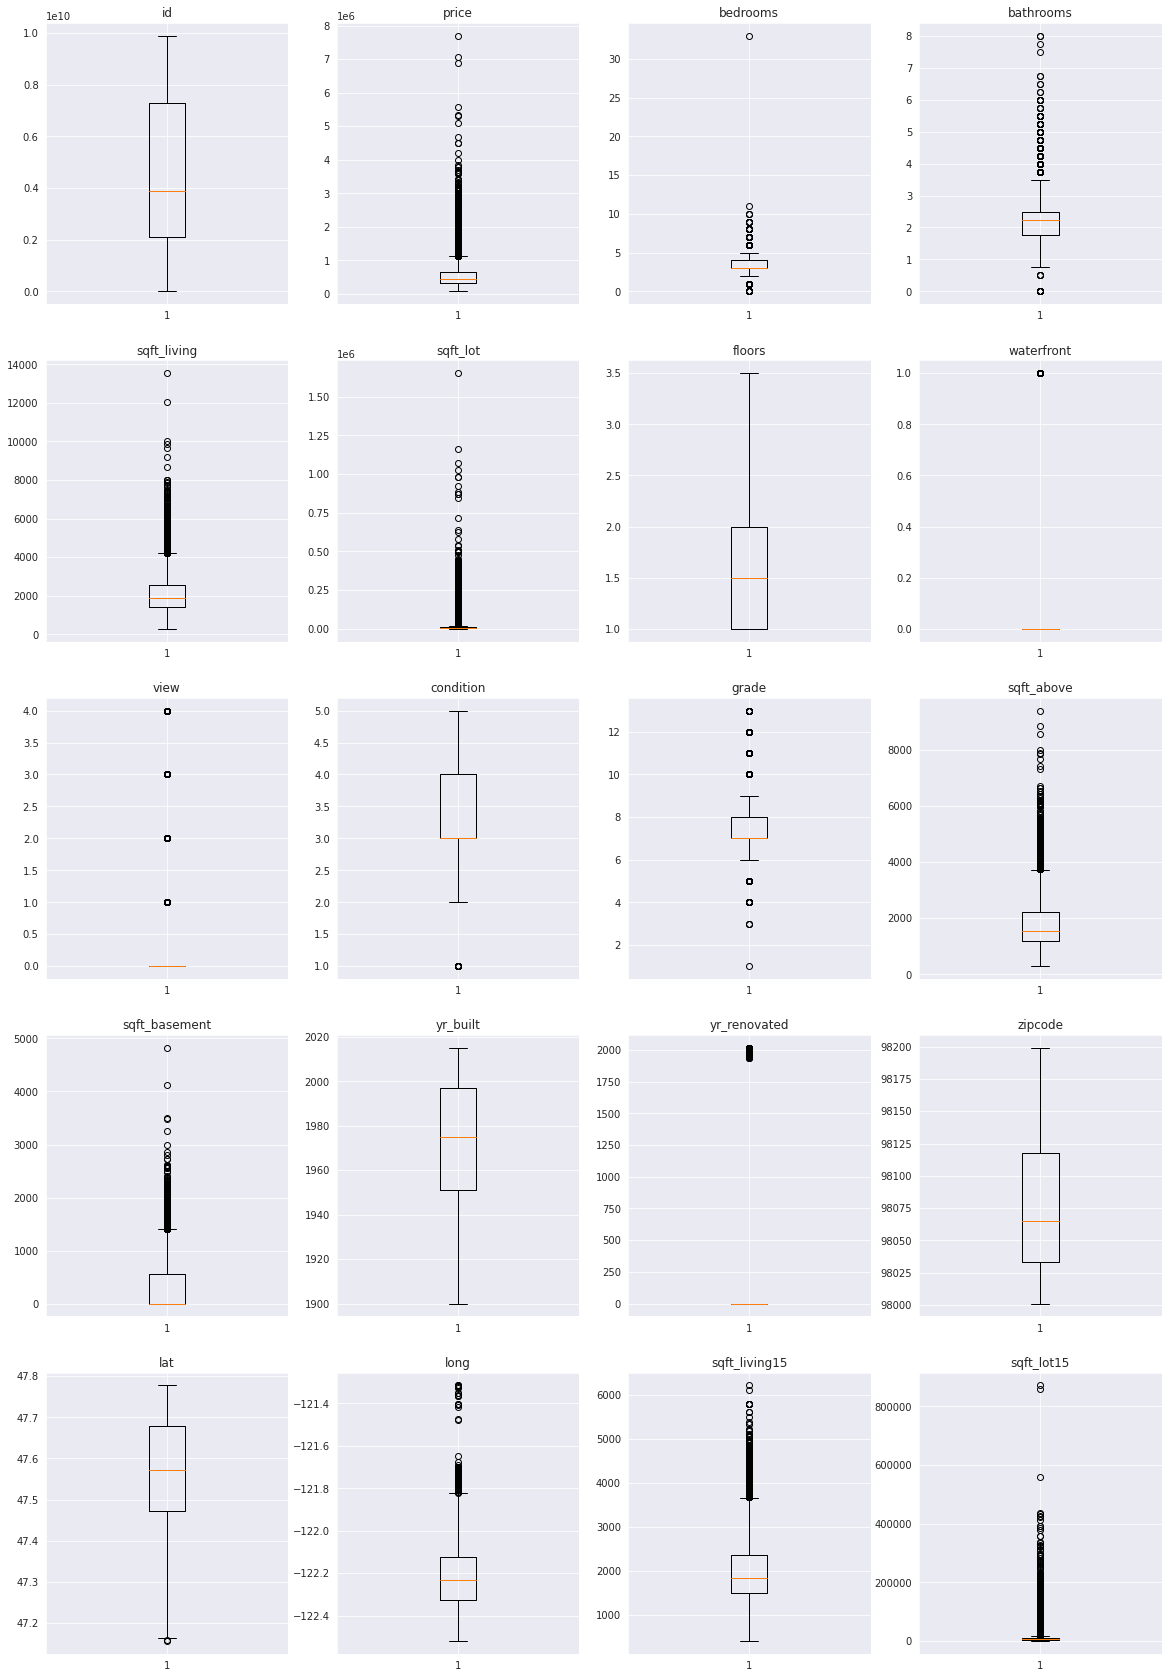

In [80]:
#Checking for outliers
columns_dict = {'id': 1, 'price': 2, 'bedrooms': 3, 'bathrooms': 4, 'sqft_living': 5, 'sqft_lot': 6,
       'floors': 7, 'waterfront': 8, 'view': 9, 'condition': 10, 'grade': 11, 'sqft_above': 12,
       'sqft_basement': 13, 'yr_built': 14, 'yr_renovated':15, 'zipcode': 16, 'lat': 17, 'long': 18,
       'sqft_living15': 19, 'sqft_lot15': 20}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

In [81]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df1.shape)

# Printing the shape of our old dataset
print(df.shape)

(14935, 20)
(21610, 20)


In [82]:
df=df1

The outliers have been dealt with

In [83]:
#Dropping unnecessary columns
df.drop(['id'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [84]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

zipcode should be in string format rather than integer, the year columns should be in the date time format

In [85]:
# converting zipcode to string datatype
df['zipcode'] = df['zipcode'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
# converting year to datetime
df['yr_built'] = pd.to_datetime(df['yr_built'])
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


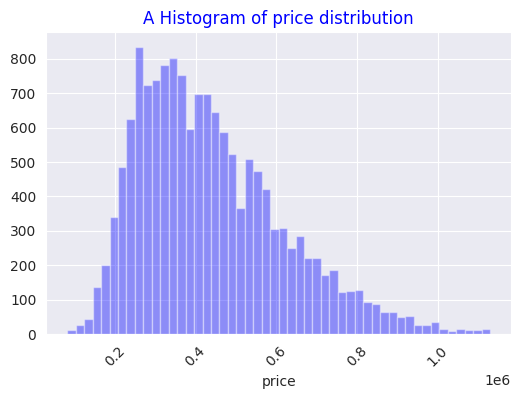

In [87]:
# Histogram of the price distribution

# Using seaborn library to visaulize
# specifying the grid size and style settings
# Giving our chart a title
# Displaying the x axis at a 45 degree angle
# Displaying our chart
plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(df["price"], kde = False, color = 'blue')
plt.title("A Histogram of price distribution", color = 'blue')
plt.xticks(rotation = 45)
plt.show()


The histogram is not normally distributed but it's instead skewed to the right

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


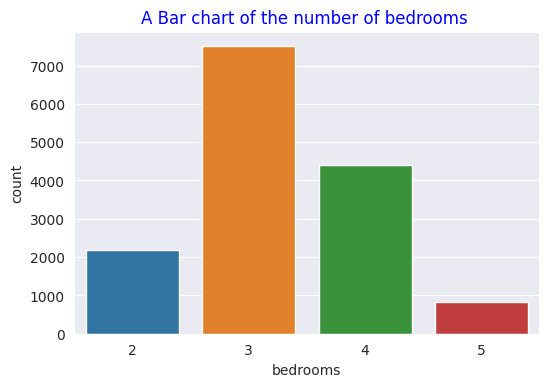

In [88]:
# Barplot of the number of bedrooms available

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.bedrooms)
plt.title('A Bar chart of the number of bedrooms ', color = 'blue')
plt.show()



3 bedroom houses have more records

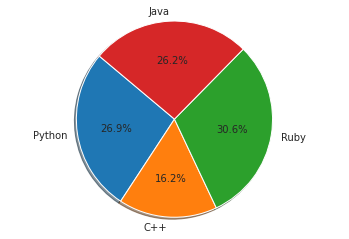

In [89]:
labels = ['Python', 'C++', 'Ruby', 'Java']
sizes = [215, 130, 245, 210]
# Plot
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**BIVARIATE ANALYSIS**

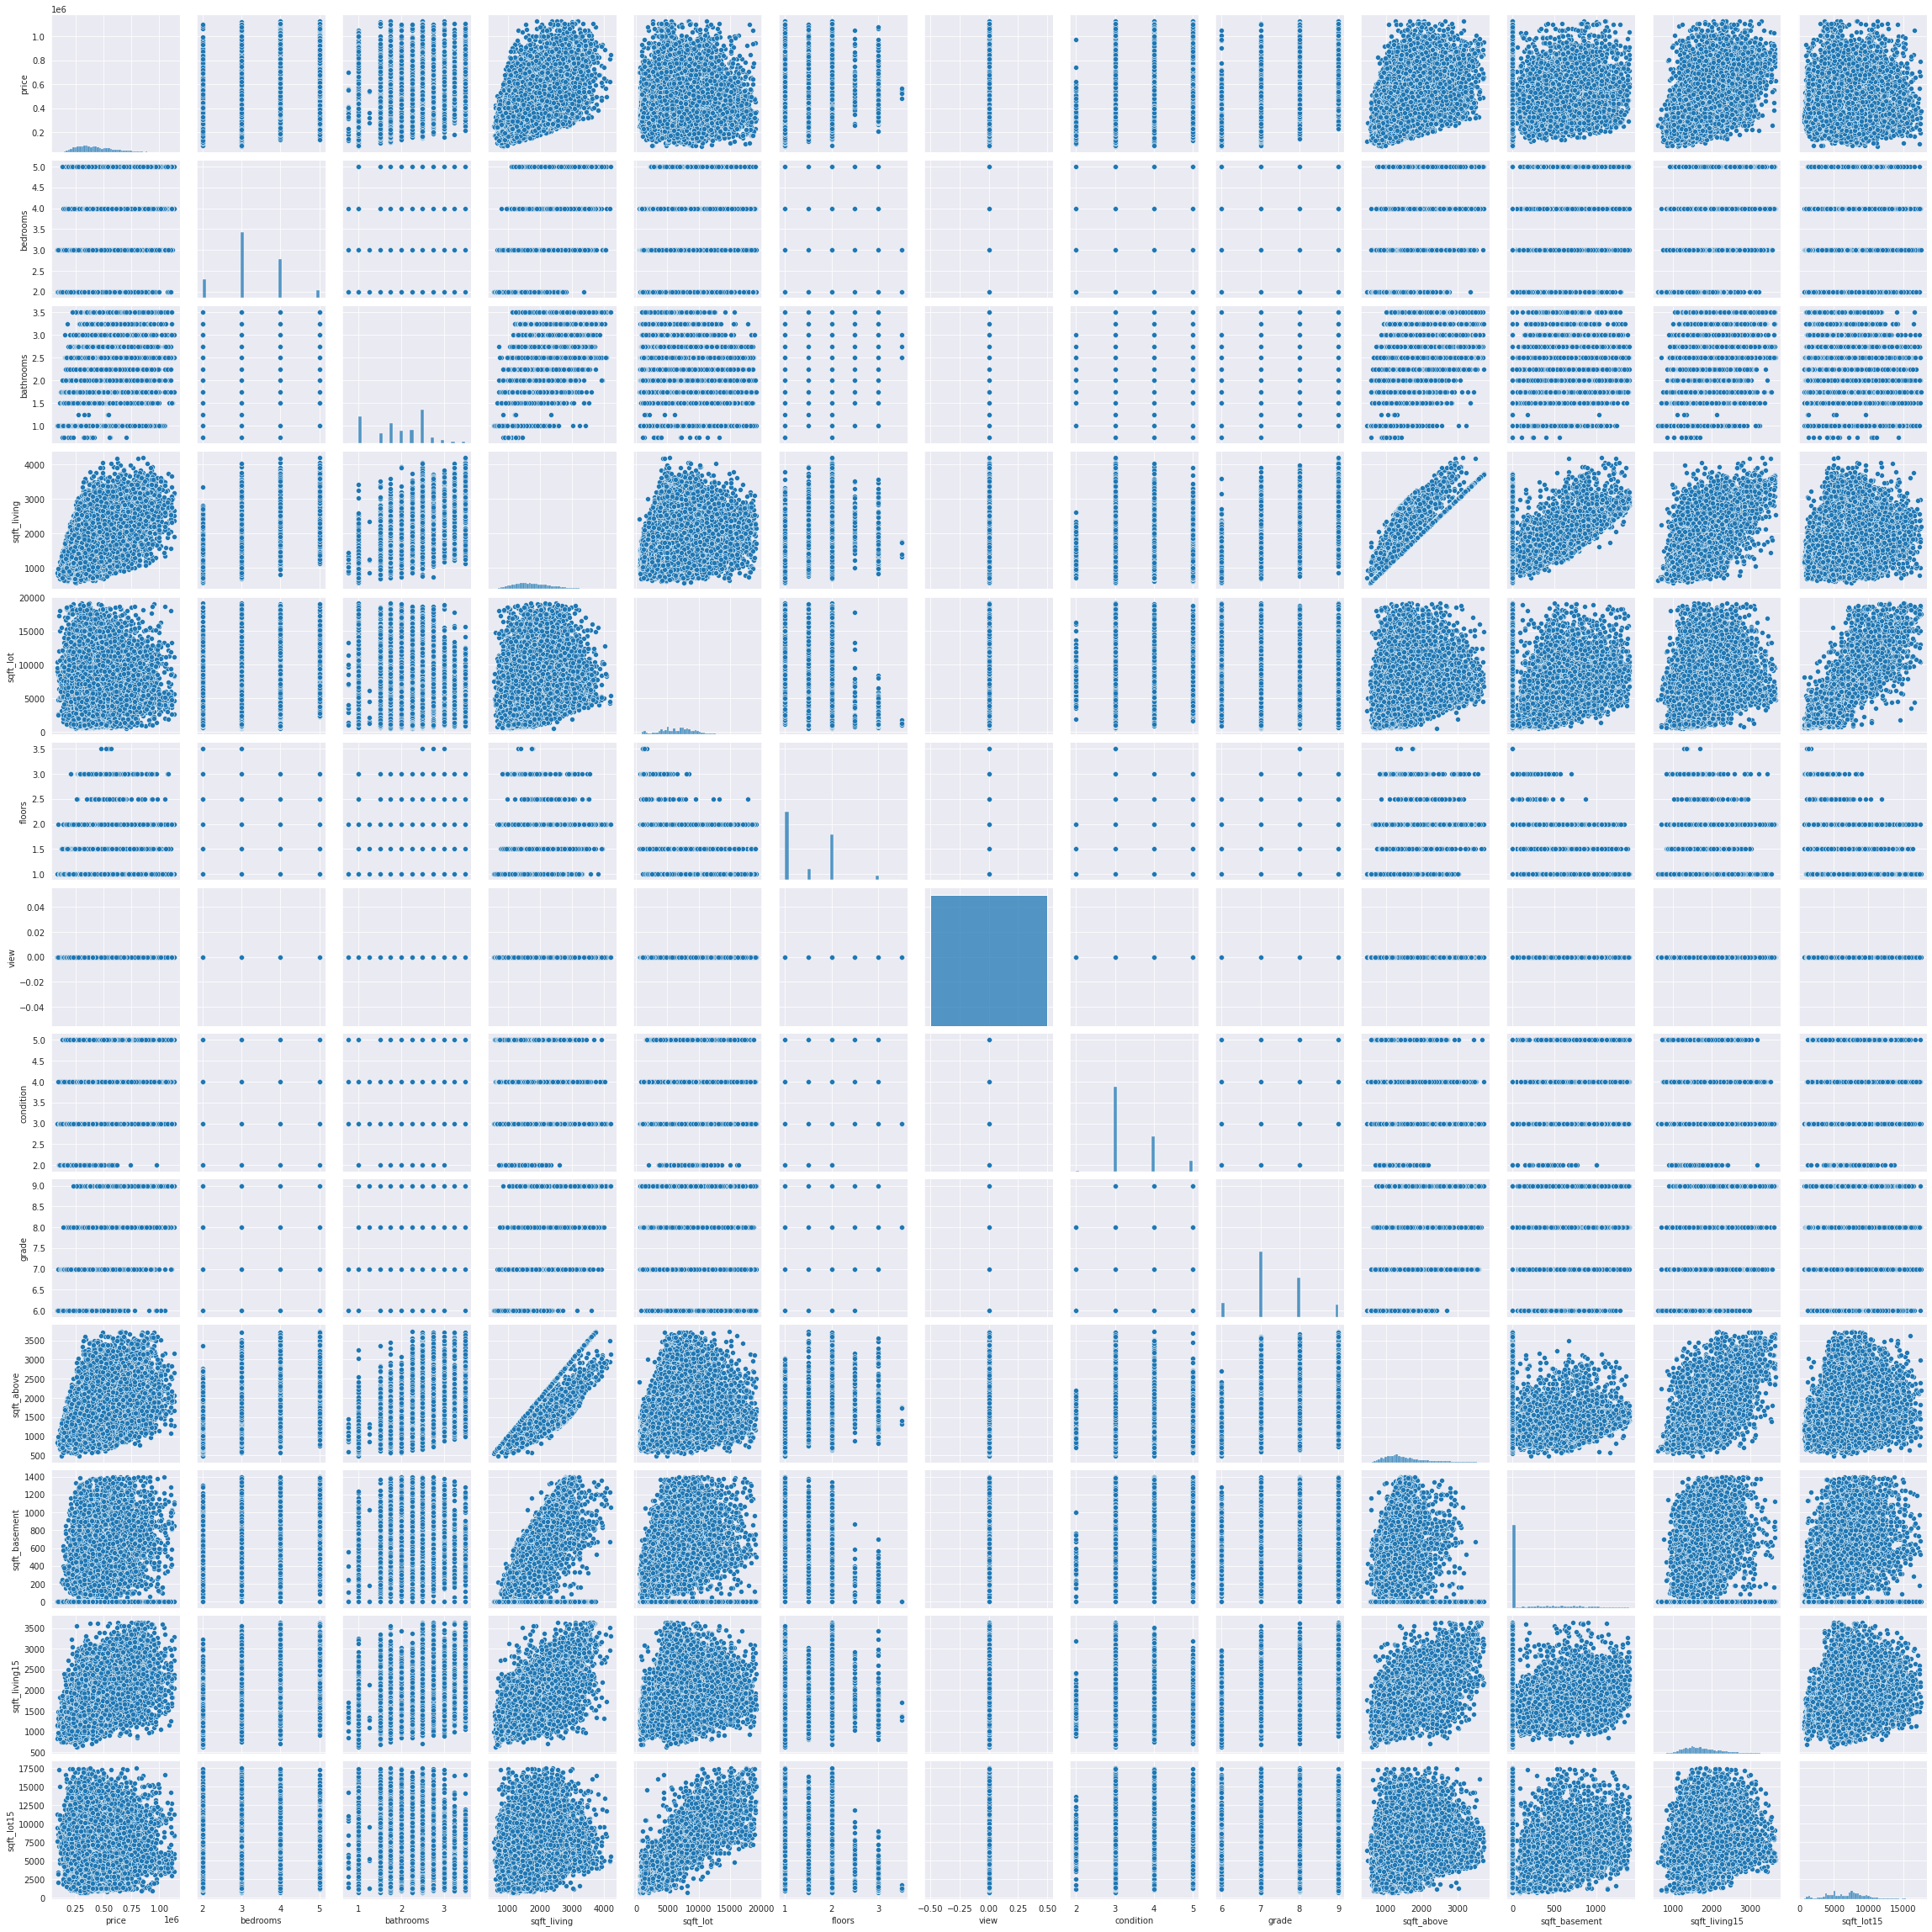

In [90]:
#Scatter plots of the numerical variables

numerical = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']]
sns.pairplot(numerical)
plt.show()

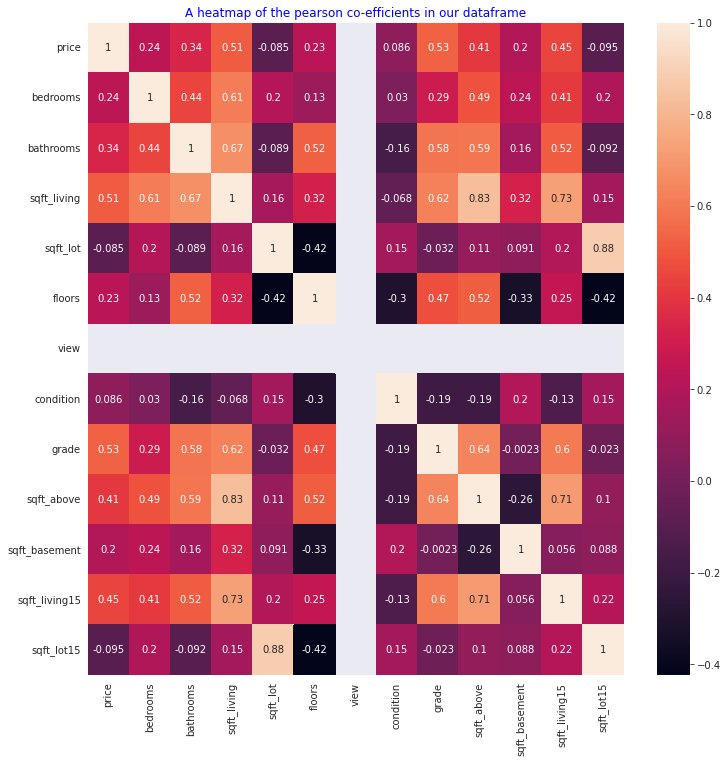

In [91]:
#Correlation heatmap

# defining our data
# figure size specifications
# using the Seaborn Visualization library
# Rotating our x axis ticks
# Rotating our y axis ticks
# labelling the title
# displaying our chart


# Vizualise the correlation matrix using a heat map
#
plt.figure(figsize=(12, 12))
sns.heatmap(numerical.corr(),  annot=True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "blue")
#plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

It's observed that the factors which are correlated to the price are

**MULTIVARIATE ANALYSIS**

lINEAR DISCRIMINANT ANALYSIS(LDA)

In [92]:
dl=df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement']]
dl.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0
6,257500.0,3,2.25,1715,6819,2.0,0,3,7,1715,0


In [93]:
#Dividing the dataset into feature and independent variable
x = dl.drop(columns = ['price'])
y = dl['price']
#
print(x)
print(y)

       bedrooms  bathrooms  sqft_living  ...  grade  sqft_above  sqft_basement
0             3       1.00         1180  ...      7        1180              0
2             2       1.00          770  ...      6         770              0
3             4       3.00         1960  ...      7        1050            910
4             3       2.00         1680  ...      8        1680              0
6             3       2.25         1715  ...      7        1715              0
...         ...        ...          ...  ...    ...         ...            ...
21608         3       2.50         1530  ...      8        1530              0
21609         4       2.50         2310  ...      8        2310              0
21610         2       0.75         1020  ...      7        1020              0
21611         3       2.50         1600  ...      8        1600              0
21612         2       0.75         1020  ...      7        1020              0

[14935 rows x 10 columns]
0        221900.0
2      

In [94]:
#Standarfrom sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn import metrics

In [95]:
# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()
#
lda= lda.fit(dl, y)
lda_dl = lda.transform(dl)

In [96]:
# Display the coeficients of the reducted columns
lda.coef_

array([[ 0.00000000e+00,  1.21174672e+00, -4.50065032e-01, ...,
        -2.68604536e+00, -1.57159647e-03, -1.97337470e-03],
       [ 0.00000000e+00, -1.51837600e+00,  7.86846623e-02, ...,
        -2.93792277e+00, -5.43467514e-04, -1.24908041e-03],
       [ 0.00000000e+00,  1.31262932e+00, -4.41691824e-01, ...,
        -2.60578786e+00, -1.47323495e-03, -2.10685392e-03],
       ...,
       [ 0.00000000e+00,  6.13339162e-01, -1.38985834e+00, ...,
         2.16064823e+00,  6.79348419e-04,  4.68299822e-03],
       [ 0.00000000e+00, -2.76957701e+00, -9.42733315e+00, ...,
         5.21705073e+00,  1.44217270e-03,  1.11069647e-02],
       [ 0.00000000e+00,  1.02018292e+00, -2.92400571e+00, ...,
         4.10310927e+00,  9.71321198e-05,  2.99817119e-03]])

In [97]:
# displaying coeffient in dataframe.
#
coeff = pd.DataFrame(index=dl.columns.values, data=lda.coef_[0].T)
coeff.sort_values(0, ascending=False)

,0
bedrooms,1.211747e+00
floors,1.122746e+00
sqft_lot,5.732009e-04
price,0.000000e+00
view,-1.504703e-16
sqft_above,-1.571596e-03
sqft_basement,-1.973375e-03
sqft_living,-2.553742e-03
bathrooms,-4.500650e-01
condition,-2.351017e+00


**MODELLING**

**REGRESSION ANALYSIS**

In [98]:
# using the correlation coefficients o compute the VIF score for each variable we have:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

NameError: ignored

the VIF score for each variable is found along the sloping diagonal downward

In [100]:
# residual plots and heteroskedasticity testing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dl.values
y = dl['price'].values

X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.4, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, price_train)

# This is our prediction for admission based on our model
price_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.0

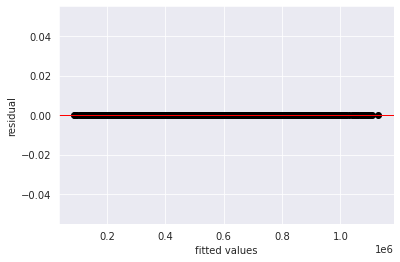

In [101]:
# residual plot
import matplotlib.pyplot as plt

plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [102]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2241: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


**MULTIPLE LINEAR REGRESSION**

In [104]:
#separating independent and dependent variable
#X = df1.iloc[:,1:].values
#y = df1.iloc[:,0].values
X = dl.iloc[:,1:-1].values
y = dl.iloc[:,-1] .values

In [105]:
##splitting dataset into training and testing dataset
#Train using 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
# Fitting Multiple Linear Regression to the Training set
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# Creating a baseline regression model
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)

1.7080412646241332e-25


In [107]:
# regression coefficient
regressor.intercept_

2.2737367544323206e-13

In [108]:
# regression coeefficient
regressor.coef

AttributeError: ignored

In [109]:
for i in range(4):
    print(regressor.coef_[i])

2.828886618221768e-13
2.1439794384292554e-13
0.999999999999999
1.3877787807814457e-17


In [110]:
# comparing the predicted and actual data
#We can compare y_pred and y_test to find its accuracy
y_pred = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()


,Actual,Predicted
count,2987.000000,2.987000e+03
mean,217.839304,2.178393e+02
std,348.893305,3.488933e+02
min,0.000000,-2.119194e-12
25%,0.000000,1.021405e-13
50%,0.000000,3.850253e-13
75%,400.000000,4.000000e+02
max,1400.000000,1.400000e+03


In [ ]:
# Predicting the Test set results
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# root mean squared error for X-train
rmse=np.sqrt(mean_squared_error(y_train,regressor.predict(X_train)))
rmse

In [ ]:
# regressor score
regressor.score(X_train,y_train)

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()

In [ ]:
# findning the random states
for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= i)
    a=np.sqrt(-cross_val_score(regressor,X_test,y_test,cv=10,scoring="neg_mean_squared_error")).mean()
    b=np.sqrt(mean_squared_error(y_test,regressor.predict(X_test)))
    if(abs(a-b)<1):
        print(abs(a-b))
        print("RandomState: "+"{}".format(i))

**QUANTILE REGRESSION**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
# recalling the base model
print(first_model)

In [ ]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', df2)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 2.55e+05 and our slope or the coefficient for our x is  4.75e+04. 
# These are the parameters for the 0.5th quantile of our y. 

**RIDGE REGRESSION**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 0.38 is worse than what the baseline model was. 

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

**LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

In [ ]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

In [ ]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

**ELASTIC NET REGRESSION**

In [ ]:
# importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Creating our linear regression model for the purpose of comparison
print(first_model) 

# This mean standard error score of 1.05 is our benchmark for determining 
# if the elastic net model will be better or worst. 

In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=Tr

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

In [ ]:
from sklearn.linear_model import ElasticNet
X = df2.iloc[:,1:-1].values
y = df2.iloc[:,-1] .values
regr = ElasticNet(random_state=0)
regr.fit(X, y)
third_model = (mean_squared_error(y_true=y,y_pred=regr.predict(X)))
print(third_model)

In [ ]:
print(regr.coef_)

In [ ]:
print(regr.intercept_)

In [ ]:
df2.shape

In [ ]:
print(regr.predict([[0,1,2,3,4,5,6,7]]))